In [ ]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

import sklearn

import pickle

import warnings

In [2]:
# importing algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [3]:
# importing Scikit-Learn helpers
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [19]:
# for metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('analytical_base_table.csv')

## 1) Splitting dataset

In [5]:
# Target variable
y = df.status

# Input features
X = df.drop('status',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.status)

## 2) Building model pipelines

In [7]:
pipelines = {'l1':make_pipeline(StandardScaler(),LogisticRegression(penalty='l1',random_state=123)),
           'l2':make_pipeline(StandardScaler(),LogisticRegression(penalty='l2',random_state=123)),
           'rf':make_pipeline(StandardScaler(),RandomForestClassifier(random_state=123)),
           'gb':make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))}

In [8]:
pipelines

{'gb': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
    ...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False))]), 'l1': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]), 'l2': Pipeline(memory=None,
      steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', L

## 3) Declaring hyperparameters

In [9]:
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l1', random_state=123, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'warn',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'warn',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,

In [10]:
# logistic regression hyperparameter grid
l1_hyperparameters = {'logisticregression__C':np.linspace(1e-3, 1e3, 10)}

l2_hyperparameters = {'logisticregression__C':np.linspace(1e-3, 1e3, 10)}

In [11]:
pipelines['rf'].get_params()

{'memory': None,
 'randomforestclassifier': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
             oob_score=False, random_state=123, verbose=0, warm_start=False),
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_impurity_split': None,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf'

In [12]:
# random forest hyperparameter grid
rf_hyperparameters ={'randomforestclassifier__n_estimators':[100, 200],
                    'randomforestclassifier__max_features':['auto','sqrt',0.33]}

In [13]:
pipelines['gb'].get_params()

{'gradientboostingclassifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100,
               n_iter_no_change=None, presort='auto', random_state=123,
               subsample=1.0, tol=0.0001, validation_fraction=0.1,
               verbose=0, warm_start=False),
 'gradientboostingclassifier__criterion': 'friedman_mse',
 'gradientboostingclassifier__init': None,
 'gradientboostingclassifier__learning_rate': 0.1,
 'gradientboostingclassifier__loss': 'deviance',
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__max_features': None,
 'gradientboostingclassifier__max_leaf_nodes': None,
 'gradientboostingclassifier__min_impurity_decrease': 0.0,
 'gradi

In [14]:
# boosted tree hyperparameter grid
gb_hyperparameters = {'gradientboostingclassifier__n_estimators':[100,200],
                     'gradientboostingclassifier__learning_rate':[0.05,0.1,0.2],
                     'gradientboostingclassifier__max_depth':[1,3,5]}

In [15]:
hyperparameters = {'l1':l1_hyperparameters,
                   'l2':l2_hyperparameters,
                   'rf':rf_hyperparameters,
                   'gb':gb_hyperparameters}

## 4) Fitting & Tuning models with cross validation

In [17]:
fitted_models = {}

with warnings.catch_warnings():      # to ignore DataConversionWarning due to StandardScaler
    warnings.simplefilter("ignore")
    for name,pipeline in pipelines.items():
        model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs= -1)
        model.fit(X_train, y_train)
        fitted_models[name] = model
        print(name,' has been fitted.')

C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l1  has been fitted.


C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2  has been fitted.


C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf  has been fitted.


C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb  has been fitted.


## 5) Evaluating metrics

In [18]:
for name, model in fitted_models.items():
    print(name,model.best_score_)

C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


l1 0.8493868846632309
l2 0.8493868846632309
rf 0.979651679402879


C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


gb 0.9752088146436823


In [32]:
# Area under ROC curve for L1-regularized ogistic regression
pred = fitted_models['l1'].predict_proba(X_test)

pred = [p[1] for p in pred]

pred[:10]

C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


[0.030570398675690162,
 0.004442513021544129,
 0.007296468196969995,
 0.08809488966293264,
 0.0711503462848833,
 0.48161520731148866,
 0.12605157400968311,
 0.6152983084915888,
 0.7266609867522104,
 0.1370391019312878]

##### Calculating FPR, TPR &  threshold for prediction of each observation

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [24]:
pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Thresholds':thresholds}).tail(10)

,FPR,TPR,Thresholds
533,0.759925,0.994056,0.009628
534,0.784680,0.994056,0.008120
535,0.784680,0.995542,0.008077
536,0.910322,0.995542,0.001963
537,0.910322,0.997028,0.001950
538,0.932742,0.997028,0.001394
539,0.932742,0.998514,0.001388
540,0.949089,0.998514,0.001051
541,0.949089,1.000000,0.001040
542,1.000000,1.000000,0.000027


fig = plt.figure(figsize=(8,8))
plt.title('Reciever Operating Characteristic')
plt.plot(fpr,tpr, label='l1')
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'k--')        #45 degree line

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
auc(fpr, tpr)  #area under roc curve in above plot

0.9015395313878269

C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


l1 0.9015395313878269
l2 0.9015388373737675
rf 0.9915194952019338
gb 0.9886802836851869


C:\Users\ANKITA SINGH\Anaconda3\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype bool, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


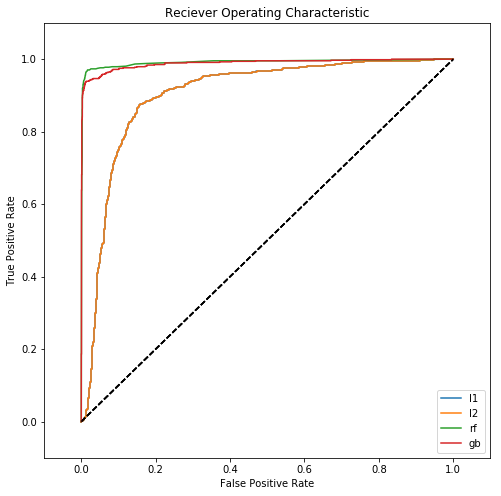

In [38]:
# comparing all models

fig = plt.figure(figsize=(8,8))

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))
    
    plt.title('Reciever Operating Characteristic')
    plt.plot(fpr,tpr, label= name)
    plt.legend(loc = 'lower right')
    plt.plot([0,1],[0,1],'k--')        #45 degree line

    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
plt.show()


    

### The above plot crearly shows that the curve of rf is the farthest from 45 degree line and hence area under the curve is the largest. Hence, our best performing model is random forest.

## 6) Saving the winning model

In [39]:
with open('final_model.pkl','wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)  #best_estimator_ attribute is to save our cross validated object as pipeline